Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64
StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64
0
StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene    

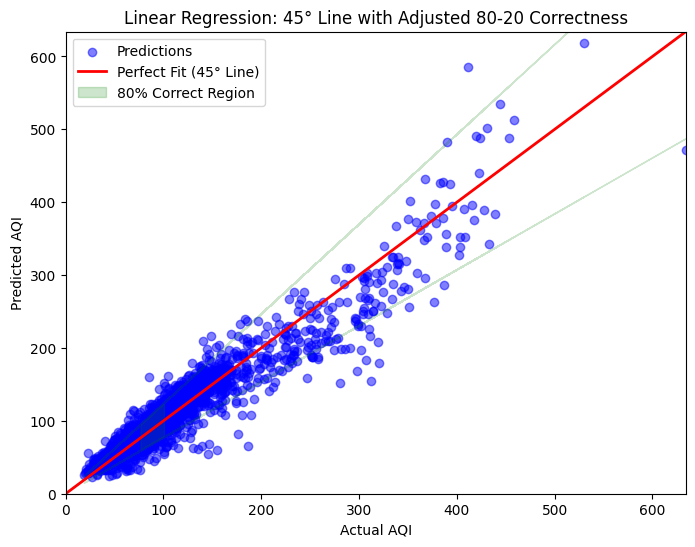

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv("station_day.csv")

print(df.isnull().sum())
print(df.isna().sum())

print(df.duplicated().sum())

df.dropna(inplace=True)
print(df.isnull().sum())

print(df.info())
print(df.describe())


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv("station_day.csv")
print(df.head())
print(df.info())
print(df.describe())
df.dropna(inplace=True)
print(df.isnull().sum())
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene"]
target = "AQI"

df = df[features + [target]]

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

import numpy as np
import matplotlib.pyplot as plt

percentage_error = np.abs((y_pred - y_test) / y_test)

sorted_errors = np.sort(percentage_error)
threshold_index = int(0.8 * len(sorted_errors))
error_threshold = sorted_errors[threshold_index]

correct_predictions = np.sum(percentage_error <= error_threshold)
total_predictions = len(y_test)

accuracy_80 = (correct_predictions / total_predictions) * 100
defect_20 = 100 - accuracy_80

print(f"Adjusted Error Threshold: {error_threshold:.4f}")
print(f"80-20 Accuracy: {accuracy_80:.2f}% Correct")
print(f"20% Defect Allowed: {defect_20:.2f}% Incorrect")
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predictions")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linewidth=2, label="Perfect Fit (45° Line)")

lower_bound = y_test * (1 - error_threshold)
upper_bound = y_test * (1 + error_threshold)
plt.fill_between(y_test, lower_bound, upper_bound, color="green", alpha=0.2, label="80% Correct Region")

plt.xlim([0, max_val])
plt.ylim([0, max_val])

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Linear Regression: 45° Line with Adjusted 80-20 Correctness")
plt.legend()
plt.show()